## Testando com mais tempo e mais dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import extractor as ext

In [2]:
fbase = pd.read_csv('./1_filtered.csv', header=None)
fbase.head()

,0,1,2,3
0,8.456798,-4.466378,7.215951,0.019221
1,8.454815,-4.464132,7.212556,0.019295
2,8.453542,-4.461002,7.207107,0.019680
3,8.449433,-4.457170,7.201194,0.020556
4,8.440568,-4.453560,7.195996,0.020409


In [3]:
extractor = ext.RecordExtractor(norm=True) # set 0 as first item
cycles = extractor.read_sample(fbase)
np.array(cycles).shape

(4, 5)

In [4]:
import dataset_creation as dtc

ds, offsetted_ds = dtc.create_dataset(fbase, time_ms=600)

In [5]:
offsetted_ds.head(10)

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.029405,10.132518,350,0.774739,0.714504,0.021299,0.031459,12.459358,467,...,52,0.925832,0.824661,0.007794,0.006325,2.618580,20,0.743834,0.720893,0.004525
1,rest,0.338764,145.118427,1123,0.878671,0.851127,0.258561,0.291927,146.870687,1109,...,993,0.963864,0.962200,0.084331,0.010679,3.833016,59,0.719470,0.523739,0.007678
2,rest,0.021671,7.213547,213,0.759029,0.660268,0.015156,0.022970,7.044677,210,...,60,0.839379,0.676369,0.007350,0.022640,7.050325,207,0.522047,0.286833,0.012988
3,rest,0.052656,18.262196,633,0.766194,0.699608,0.037299,0.086512,52.839819,994,...,212,0.891606,0.740163,0.013117,0.006153,2.143498,12,0.658940,0.559863,0.003998
4,rest,0.027199,9.609158,371,0.848054,0.820414,0.021310,0.030284,12.305054,460,...,81,1.045390,1.018652,0.009075,0.002165,1.073322,0,0.943854,0.961897,0.001745
5,extension,0.027130,10.018519,374,0.879675,0.832281,0.021583,0.033779,14.275140,523,...,77,1.061278,0.952614,0.008027,0.003029,1.341017,0,0.872345,0.847494,0.002396
6,extension,0.034186,12.388564,475,0.841070,0.791399,0.025929,0.037040,15.984961,581,...,123,1.026116,1.002284,0.009912,0.004046,1.677856,1,0.816494,0.805234,0.003052
7,extension,0.048177,17.394558,637,0.821084,0.780883,0.036100,0.052095,20.476092,695,...,247,0.962574,0.919953,0.016705,0.004994,2.093740,0,0.868820,0.867075,0.003876
8,extension,0.024615,9.572541,353,0.894224,0.848603,0.019380,0.033423,13.852553,529,...,115,0.980683,0.938278,0.010596,0.003137,1.377734,0,0.904300,0.912550,0.002537
9,extension,0.021677,10.462684,398,1.059671,1.053949,0.016724,0.025740,11.119378,431,...,141,1.219673,1.259898,0.008095,0.007281,3.106201,11,0.806791,0.799644,0.005542


In [6]:
bases =[ ]
for i in range(1, 41):
    b = pd.read_csv(f'./{i}_filtered.csv', header=None)
    bases.append(b)

ds_s = []
for i in (bases):
    _, d = dtc.create_dataset(i, time_ms=1000)
    ds_s.append(d)


full_ds = pd.concat(ds_s)
full_ds

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.027969,16.546442,593,0.829877,0.760960,0.020834,0.030327,20.467188,786,...,73,0.980622,0.878791,0.007530,0.006686,4.317294,31,0.739443,0.656068,0.004683
1,rest,0.314325,232.015644,1874,0.935619,0.873679,0.237730,0.290001,257.021178,1856,...,1613,1.008992,0.948542,0.071562,0.018218,11.062762,341,0.730146,0.491705,0.012646
2,rest,0.021656,13.160815,416,0.866464,0.759422,0.015649,0.021771,12.884492,403,...,219,1.006224,0.734301,0.009192,0.062570,35.654638,844,0.574473,0.184307,0.035975
3,rest,0.056408,35.352780,1188,0.891258,0.775229,0.041269,0.085088,84.416590,1631,...,541,0.974775,0.772864,0.016589,0.007947,5.389142,65,0.798949,0.581650,0.005505
4,rest,0.053758,28.227306,877,0.713120,0.601534,0.033820,0.044414,28.766126,970,...,269,0.763192,0.676346,0.013872,0.009064,4.063544,73,0.480649,0.392418,0.004072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,pronation,0.031782,20.937533,828,0.970136,0.901310,0.024678,0.039178,29.662400,1041,...,464,0.917684,0.763177,0.014408,0.013973,4.804249,104,0.370716,0.191923,0.005911
46,pronation,0.110862,87.776926,1680,1.076162,1.033610,0.084013,0.107864,87.675295,1682,...,165,1.019753,0.953556,0.008903,0.003019,1.714108,9,0.665471,0.622435,0.001838
47,pronation,0.040960,28.047037,1019,0.984024,0.841470,0.030597,0.044734,32.830290,1157,...,401,1.039154,0.974904,0.012704,0.009379,5.550930,109,0.677512,0.475449,0.005559
48,pronation,0.033451,22.912231,857,0.934632,0.803825,0.024615,0.036417,26.631768,935,...,102,1.024710,0.938450,0.007587,0.001847,1.429974,0,0.909609,0.915220,0.001506


In [37]:
bases_2 =[ ]
for i in range(1, 41):
    b = pd.read_csv(f'./{i}_filtered.csv', header=None)
    bases_2.append(b)

ds_s_2 = []
for i in (bases_2):
    _, d = dtc.create_dataset(i, time_ms=800)
    ds_s_2.append(d)


full_ds_2 = pd.concat(ds_s_2)
full_ds_2

In [36]:
full_ds_2.to_csv("./all_data_300ms.csv")

In [32]:
full_ds.to_csv("./all_data_1sec_2.csv")

In [7]:
full_ds['class'].unique()

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [8]:
full_ds.loc[full_ds['class'] == 'rest' ].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.097811,80.131693,1159.410000,0.980610,0.873757,0.072956,0.116838,100.485440,1263.570000,1.043863,...,540.145000,0.968157,0.848166,0.025146,0.033522,23.927760,398.080000,0.751747,0.618022,0.023519
std,0.103953,94.870428,548.686428,0.113134,0.146575,0.078181,0.126862,118.552859,504.668452,0.136300,...,504.779462,0.146360,0.191001,0.029475,0.064562,50.629242,556.699005,0.134555,0.213916,0.047253
min,0.007774,5.106114,43.000000,0.674045,0.417748,0.005679,0.011498,8.084445,190.000000,0.725983,...,0.000000,0.453494,0.200112,0.003319,0.000786,0.596367,0.000000,0.222669,0.068477,0.000620
25%,0.031709,20.435852,725.250000,0.898442,0.785694,0.022350,0.034606,23.139171,807.250000,0.949038,...,143.750000,0.880609,0.730052,0.009936,0.004968,3.610882,11.250000,0.682320,0.479932,0.003412
50%,0.055413,33.860616,1132.500000,0.973893,0.866838,0.039840,0.063622,43.295080,1305.500000,1.050851,...,377.000000,0.989160,0.883399,0.014366,0.010930,6.199612,123.500000,0.765668,0.657159,0.006879
75%,0.125187,106.773736,1731.000000,1.060300,0.969163,0.094721,0.156446,134.621199,1776.250000,1.155791,...,702.000000,1.063188,0.969638,0.024784,0.023038,14.629061,480.500000,0.847651,0.779672,0.014483
max,0.637500,530.420966,1952.000000,1.224183,1.211287,0.479562,0.826958,690.622242,1946.000000,1.385299,...,1874.000000,1.297281,1.284944,0.226195,0.612545,476.770170,1912.000000,0.992931,0.971179,0.439354


In [9]:
full_ds.loc[full_ds['class'] == 'extension'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.054905,38.109531,988.965000,0.970767,0.881973,0.041187,0.059543,43.495382,1110.955000,1.021646,...,378.070000,1.019414,0.941939,0.016316,0.012050,7.718560,143.710000,0.804101,0.725192,0.008477
std,0.043762,32.920590,459.466813,0.124262,0.146808,0.032973,0.040768,31.409046,372.413564,0.113879,...,317.062087,0.153108,0.170536,0.013143,0.019744,11.867039,288.631942,0.109362,0.145643,0.013730
min,0.007638,6.167235,72.000000,0.451742,0.366203,0.005930,0.008351,6.409907,70.000000,0.640389,...,6.000000,0.636179,0.472374,0.004722,0.001570,1.146954,0.000000,0.381609,0.200072,0.001174
25%,0.027042,17.759074,642.000000,0.892644,0.790482,0.019929,0.031098,21.696880,798.500000,0.949525,...,142.000000,0.921098,0.822746,0.009472,0.004436,3.064551,3.000000,0.749629,0.650215,0.003220
50%,0.039055,25.935559,963.500000,0.968306,0.884820,0.029186,0.045237,31.666234,1101.000000,1.019978,...,297.000000,1.025789,0.953678,0.012426,0.006478,4.500788,25.500000,0.810943,0.741803,0.004496
75%,0.068473,46.056220,1342.500000,1.047679,0.982348,0.051094,0.073414,50.960729,1382.500000,1.087419,...,499.250000,1.120223,1.051651,0.017834,0.010673,6.930584,121.000000,0.869762,0.826853,0.007851
max,0.222883,173.224347,1852.000000,1.270916,1.205898,0.176491,0.196682,167.201096,1838.000000,1.273752,...,1571.000000,1.389779,1.372834,0.097952,0.156900,86.908731,1568.000000,1.035496,0.971024,0.109716


In [10]:
full_ds.loc[full_ds['class'] == 'flexion'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.094719,78.063012,1156.260000,0.988178,0.878805,0.070489,0.110468,95.864394,1229.240000,1.042889,...,539.24000,0.972223,0.846449,0.024675,0.029751,21.229175,380.385000,0.743310,0.596000,0.020599
std,0.100109,92.157348,538.913212,0.107932,0.146772,0.074829,0.121626,115.684040,515.039036,0.137485,...,499.45301,0.138650,0.187235,0.027084,0.052603,42.539268,512.918359,0.138274,0.216596,0.038641
min,0.008427,5.723041,50.000000,0.622758,0.424402,0.006680,0.008354,6.074698,79.000000,0.578246,...,0.00000,0.589310,0.301829,0.003034,0.001004,0.770520,0.000000,0.245052,0.039172,0.000792
25%,0.031505,21.588911,751.000000,0.914357,0.791924,0.023099,0.032739,21.649817,751.500000,0.948361,...,150.25000,0.874240,0.723580,0.009631,0.005694,3.676194,17.750000,0.683581,0.445262,0.003855
50%,0.050895,34.722007,1121.500000,0.982821,0.880937,0.037727,0.056122,39.544245,1196.000000,1.032009,...,409.00000,0.963520,0.854248,0.014389,0.011315,7.162744,149.500000,0.748050,0.617342,0.007568
75%,0.127679,107.776908,1719.250000,1.058335,0.974674,0.091269,0.138919,121.554350,1756.250000,1.141782,...,752.50000,1.068447,0.972641,0.027976,0.026688,14.082553,456.250000,0.831552,0.769494,0.014902
max,0.520116,426.774589,1936.000000,1.235124,1.208093,0.377291,0.638629,554.733780,1938.000000,1.370013,...,1823.00000,1.304921,1.259454,0.145833,0.388608,310.846378,1893.000000,0.992227,0.973894,0.279253


In [11]:
def remove_outliers(ds, col):
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

In [12]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_RMS')
rest_ds.shape

(128, 25)

In [13]:
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

extension_ds = remove_outliers(extension_ds, 'SENSOR0_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_RMS')
extension_ds.shape

(143, 25)

In [14]:
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_RMS')
flexion_ds.shape

(137, 25)

In [15]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.027969,16.546442,593,0.829877,0.760960,0.020834,0.030327,20.467188,786,...,73,0.980622,0.878791,0.007530,0.006686,4.317294,31,0.739443,0.656068,0.004683
2,rest,0.021656,13.160815,416,0.866464,0.759422,0.015649,0.021771,12.884492,403,...,219,1.006224,0.734301,0.009192,0.062570,35.654638,844,0.574473,0.184307,0.035975
3,rest,0.056408,35.352780,1188,0.891258,0.775229,0.041269,0.085088,84.416590,1631,...,541,0.974775,0.772864,0.016589,0.007947,5.389142,65,0.798949,0.581650,0.005505
4,rest,0.053758,28.227306,877,0.713120,0.601534,0.033820,0.044414,28.766126,970,...,269,0.763192,0.676346,0.013872,0.009064,4.063544,73,0.480649,0.392418,0.004072
0,rest,0.029361,24.031080,896,1.125104,1.017288,0.021472,0.055836,40.964467,1236,...,366,1.087403,1.021920,0.013960,0.003617,2.894197,0,0.991895,0.971179,0.002892


In [16]:
def get_score_and_accuracy(X, Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)


    return pd.DataFrame([dr, dr_svm, dr_tree])


In [17]:
class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.951220,0.292683
1,SVM,0.841463,0.390244
2,Tree Classifier,0.817073,0.292683


Remover offsets e verificar por que os dados estão estranhos

In [18]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_APPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_APPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_APPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((192, 25), (188, 25), (189, 25))

In [19]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_APPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.850877,0.342105
1,SVM,0.745614,0.421053
2,Tree Classifier,0.789474,0.342105


In [20]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((129, 25), (136, 25), (125, 25))

In [21]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.027969,16.546442,593,0.829877,0.760960,0.020834,0.030327,20.467188,786,...,73,0.980622,0.878791,0.007530,0.006686,4.317294,31,0.739443,0.656068,0.004683
2,rest,0.021656,13.160815,416,0.866464,0.759422,0.015649,0.021771,12.884492,403,...,219,1.006224,0.734301,0.009192,0.062570,35.654638,844,0.574473,0.184307,0.035975
3,rest,0.056408,35.352780,1188,0.891258,0.775229,0.041269,0.085088,84.416590,1631,...,541,0.974775,0.772864,0.016589,0.007947,5.389142,65,0.798949,0.581650,0.005505
4,rest,0.053758,28.227306,877,0.713120,0.601534,0.033820,0.044414,28.766126,970,...,269,0.763192,0.676346,0.013872,0.009064,4.063544,73,0.480649,0.392418,0.004072
0,rest,0.029361,24.031080,896,1.125104,1.017288,0.021472,0.055836,40.964467,1236,...,366,1.087403,1.021920,0.013960,0.003617,2.894197,0,0.991895,0.971179,0.002892


In [22]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_SAMPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_SAMPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_SAMPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((193, 25), (187, 25), (194, 25))

In [23]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.782609,0.408696
1,SVM,0.834783,0.391304
2,Tree Classifier,0.817391,0.347826


In [24]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.800000,0.365217
1,SVM,0.739130,0.434783
2,Tree Classifier,0.852174,0.330435


In [25]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.852174,0.347826
1,SVM,0.878261,0.373913
2,Tree Classifier,0.869565,0.330435


In [26]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_WAMP" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.800000,0.391304
1,SVM,0.704348,0.443478
2,Tree Classifier,0.773913,0.356522


In [27]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_SAMPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.852174,0.347826
1,SVM,0.843478,0.382609
2,Tree Classifier,0.747826,0.443478


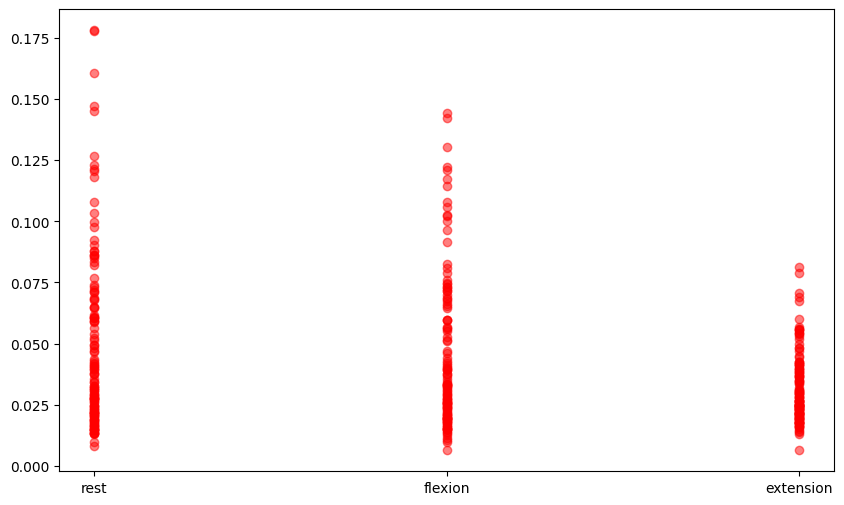

In [28]:
classes = ['rest', 'flexion', 'extension']

rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')


plt.figure(figsize=(10, 6))
plt.scatter(rest_ds['class'], rest_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(flexion_ds['class'], flexion_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(extension_ds['class'], extension_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)

In [29]:
full_ds.shape

(2000, 25)

In [30]:
full_ds.columns


train_columns = list(full_ds.columns)
train_columns.remove("class")
train_columns

['SENSOR0_RMS',
 'SENSOR0_WAVELEN',
 'SENSOR0_WAMP',
 'SENSOR0_APPEN',
 'SENSOR0_SAMPEN',
 'SENSOR0_MAV',
 'SENSOR1_RMS',
 'SENSOR1_WAVELEN',
 'SENSOR1_WAMP',
 'SENSOR1_APPEN',
 'SENSOR1_SAMPEN',
 'SENSOR1_MAV',
 'SENSOR2_RMS',
 'SENSOR2_WAVELEN',
 'SENSOR2_WAMP',
 'SENSOR2_APPEN',
 'SENSOR2_SAMPEN',
 'SENSOR2_MAV',
 'SENSOR3_RMS',
 'SENSOR3_WAVELEN',
 'SENSOR3_WAMP',
 'SENSOR3_APPEN',
 'SENSOR3_SAMPEN',
 'SENSOR3_MAV']

In [31]:
class_column = "class"
train_columns = list(full_ds.columns)
train_columns.remove("class")

X = full_ds[train_columns]
Y = full_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,3.3725,0.1050
1,SVM,3.1925,0.1100
2,Tree Classifier,3.3350,0.1425
